
# Setup



In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.options.mode.copy_on_write = True

# Using the URL for the file
spotify_original = pd.read_csv("/content/spotify_data/dataset.csv")

spotify_original_reshape = spotify_original.iloc[:,1:]

# Data Cleaning


*   Todo 1
*   Todo 2



In [ ]:
#spotify_original_reshape.head(20)
#spotify_original.shape
spotify_original_reshape




,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.4810,6,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,acoustic
6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.1470,2,-8.822,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic
7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.4440,11,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,acoustic
8,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,189613,False,0.625,0.4140,0,-8.700,1,0.0369,0.2940,0.000000,0.1510,0.6690,130.088,4,acoustic
9,7k9GuJYLp2AzqokyEdwEw2,Ross Copperman,Hunger,Hunger,56,205594,False,0.442,0.6320,1,-6.770,1,0.0295,0.4260,0.004190,0.0735,0.1960,78.899,4,acoustic


In [ ]:
spotify_original_reshape['track_name'].describe()

,track_name
count,113999
unique,73608
top,Run Rudolph Run
freq,151


In [ ]:
spotify_original_reshape['popularity'].describe()

,popularity
count,114000.000000
mean,33.238535
std,22.305078
min,0.000000
25%,17.000000
50%,35.000000
75%,50.000000
max,100.000000


In [ ]:
spotify_original_reshape['track_genre'].describe()

,track_genre
count,114000
unique,114
top,acoustic
freq,1000


In [ ]:
missing_track = spotify_original_reshape[spotify_original_reshape['track_id'] == '1kR4gIb7nGxHPI3D2ifs59']
print(missing_track)

                     track_id artists album_name track_name  popularity  \
65900  1kR4gIb7nGxHPI3D2ifs59     NaN        NaN        NaN           0   

       duration_ms  explicit  danceability  energy  key  loudness  mode  \
65900            0     False         0.501   0.583    7     -9.46     0   

       speechiness  acousticness  instrumentalness  liveness  valence  \
65900       0.0605          0.69           0.00396    0.0747    0.734   

         tempo  time_signature track_genre  
65900  138.391               4       k-pop  


In [ ]:
# Cleaning rows with missing information
missing_data_rows = spotify_original_reshape[spotify_original_reshape.isnull().any(axis=1)]

missing_data_rows

spotify_original_reshape_drop = spotify_original_reshape.dropna()

print(spotify_original_reshape.shape)
print(spotify_original_reshape_drop.shape)

Empty DataFrame
Columns: [track_id, artists, album_name, track_name, popularity, duration_ms, explicit, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, time_signature, track_genre]
Index: []


(113999, 20)

In [ ]:
#clean track_name and artists columns by stripping spaces and converting to lowercase
spotify_original_reshape_drop['track_name_clean'] = spotify_original_reshape_drop['track_name'].str.strip().str.lower()
spotify_original_reshape_drop['artists_clean'] = spotify_original_reshape_drop['artists'].str.strip().str.lower()

#priority list for genres to handle duplicates
genre_priority = ['pop', 'rock', 'hip hop', 'rap', 'reggaeton', 'latin', 'electronic', 'r&b', 'reggae', 'dance', 'classical']
spotify_original_reshape_drop['genre_priority'] = spotify_original_reshape_drop['track_genre'].apply(lambda x: genre_priority.index(x) if x in genre_priority else len(genre_priority))

#sort the dataset by track_name, artists, genre priority, popularity, and duration
spotify_data_sorted = spotify_original_reshape_drop.sort_values(by=['track_name_clean', 'artists_clean', 'genre_priority', 'popularity', 'duration_ms'],
                                                                ascending=[True, True, True, True, False])

#remove duplicates
spotify_cleaned = spotify_data_sorted.drop_duplicates(subset=['track_name_clean', 'artists_clean'], keep='first')

# checking size
print(f"Shape of the dataset before cleaning: {spotify_original_reshape_drop.shape}")
print(f"Shape of the dataset after cleaning: {spotify_cleaned.shape}")

# removing extra columns added
spotify_cleaned_final = spotify_cleaned.drop(columns=['track_name_clean', 'artists_clean', 'genre_priority'])

# Fcheck size again
print(f"Shape of the dataset after removing extra columns: {spotify_cleaned_final.shape}")


spotify_cleaned_final


113999


# Exploratory Data Analysis


*   Todo 1
*   Todo 2



<Axes: >

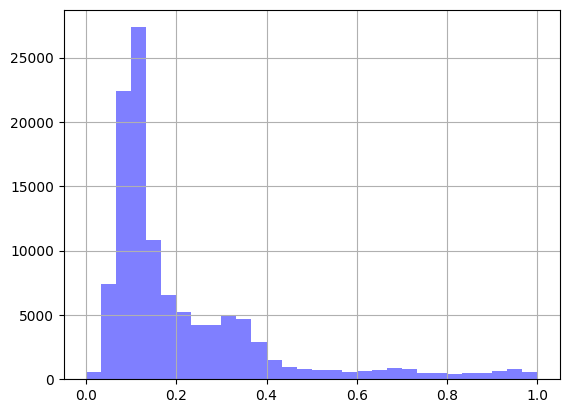

In [ ]:
spotify_original_reshape['liveness'].hist(bins = 30, alpha = 0.5, color='blue')

Text(0.5, 1.0, 'Danceability vs Popularity')

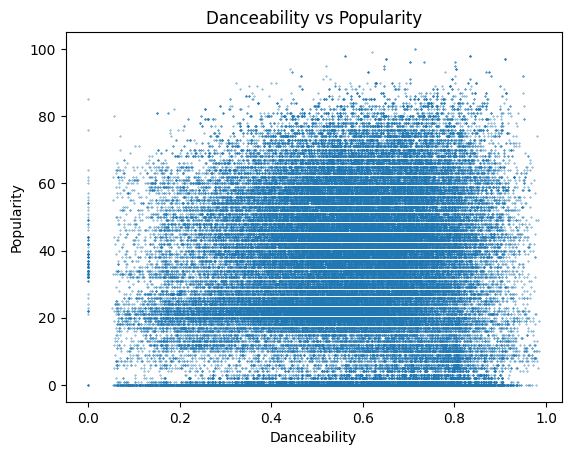

In [ ]:
"Visualizing correlation between features"

plt.scatter(spotify_original_reshape['danceability'], spotify_original_reshape['popularity'], s = 0.1)
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.title('Danceability vs Popularity')

Text(0.5, 1.0, 'Energy vs Popularity')

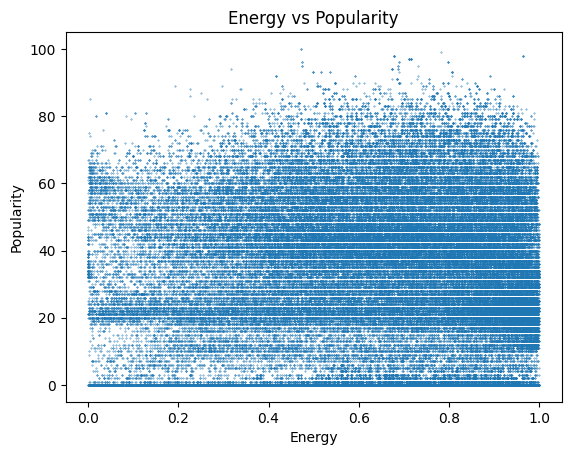

In [ ]:
"Visualizing correlation between features"
plt.scatter(spotify_original_reshape['energy'], spotify_original_reshape['popularity'], s = 0.1)
plt.xlabel('Energy')
plt.ylabel('Popularity')
plt.title('Energy vs Popularity')

In [ ]:
#Finding the Correlation Between Popularity and other features

for features in spotify_original_reshape.select_dtypes(include=[np.number]).columns:
  print(features, 'vs. Popularity Correlation:', np.corrcoef(spotify_original_reshape['popularity'], spotify_original_reshape[features])[0,1])


popularity vs. Popularity Correlation: 0.9999999999999999
duration_ms vs. Popularity Correlation: -0.007101208619704733
danceability vs. Popularity Correlation: 0.03544813475138598
energy vs. Popularity Correlation: 0.0010561362996985154
key vs. Popularity Correlation: -0.0038531547155607106
loudness vs. Popularity Correlation: 0.050423036100497816
mode vs. Popularity Correlation: -0.01393078675310794
speechiness vs. Popularity Correlation: -0.04492654926158641
acousticness vs. Popularity Correlation: -0.025472412568363353
instrumentalness vs. Popularity Correlation: -0.09513920344466387
liveness vs. Popularity Correlation: -0.005387153831593018
valence vs. Popularity Correlation: -0.040534294659946304
tempo vs. Popularity Correlation: 0.013204659932994913
time_signature vs. Popularity Correlation: 0.03107275876010795


In [ ]:
#Finding the Correlation Between Tempo and other features

for features in spotify_original_reshape.select_dtypes(include=[np.number]).columns:
  print(features, 'vs. Tempo Correlation:', np.corrcoef(spotify_original_reshape['tempo'], spotify_original_reshape[features])[0,1])


popularity vs. Tempo Correlation: 0.013204659932994911
duration_ms vs. Tempo Correlation: 0.024345605690600396
danceability vs. Tempo Correlation: -0.05044987143122011
energy vs. Tempo Correlation: 0.24785050980262313
key vs. Tempo Correlation: 0.010916619112810343
loudness vs. Tempo Correlation: 0.2124458965795156
mode vs. Tempo Correlation: 0.0005655581057944933
speechiness vs. Tempo Correlation: 0.017273223330484727
acousticness vs. Tempo Correlation: -0.20822414719631316
instrumentalness vs. Tempo Correlation: -0.0503304013278747
liveness vs. Tempo Correlation: 0.0005997673113030851
valence vs. Tempo Correlation: 0.07827306763947262
tempo vs. Tempo Correlation: 1.0
time_signature vs. Tempo Correlation: 0.0666410882063917
